In [2]:
import nltk

# Interesting reading:
https://www.nltk.org/book/ch08.html

# Ambiguity

In [ ]:
simple_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'eu'
VP -> V NP | VP PP
Det -> 'um' | 'meus'
N -> 'elefante' | 'pijamas'
V -> 'mordi'
P -> 'em' | 'com' | 'para'
""")

In [ ]:
sentence = 'Eu mordi um elefante com meus pijamas'.lower().split()
parser = nltk.ChartParser(simple_grammar)
trees = parser.parse(sentence)
for tree in trees:
    print(tree)

In [3]:
from nltk.corpus import floresta

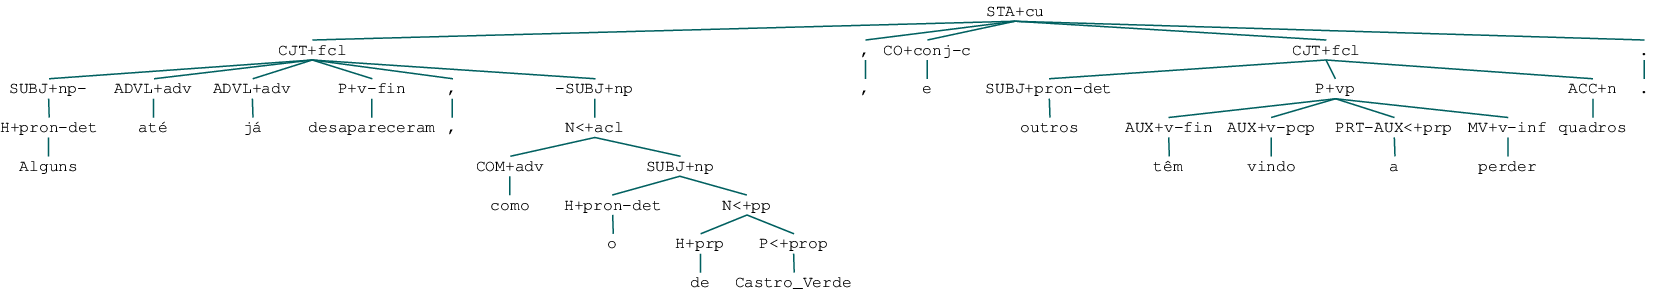

In [4]:
floresta.parsed_sents()[10]

In [5]:
productions = {}
for ps in floresta.parsed_sents():
    for prod in ps.productions():
        if prod.lhs() in productions:
            productions[prod.lhs()].add(prod.rhs())
        else:
            productions[prod.lhs()] = set()
            productions[prod.lhs()].add(prod.rhs())

Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered 

Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered by returning a flat parse.
Bad tree detected; trying to recover...
  Recovered 

In [12]:
CFG = []
for L, R in productions.items():
    for tup in R:
        Rs = []
        for item in tup:
            parts = []
            if not isinstance(item, nltk.grammar.Nonterminal):
                parts.append("'{}'".format(str(item)))
            else:
                parts.append(str(item))
        Rs.append(" ".join(parts))
    line = "{} -> {}".format(L, " | ".join(Rs))
    CFG.append(line)

In [15]:
rules = nltk.CFG.fromstring(" \n ".join(CFG))

ValueError: Unable to parse line 1: UTT+np -> H+n
Expected an arrow

# Parsers 

## ChartParser

- Is slow and not memory efficient.
- Can handle left-recursive grammars.
- Always finds all possible syntax trees.
- Is the best parser to start with. Consider other parsers only if this one is not fast enough or it’s not memory efficient enough.

## RecursiveDescentParser¶

- Does top-down parsing.
- Does not work with left-recursive productions (they sent it to an infinite loop).
- Wastes a lot of time, considering words and structures that do not correspond to the input sentence.
- When backtracking, this parser discards parsed constituents that will need to be rebuilt again later.

## ShiftReduceParser¶

- Does bottom-up parsing.
- Does not implement any backtracking, so it is not guaranteed to find a parse for a text, even if one exists. - Furthermore, it will only find at most one parse, even if more parses exist.


In [ ]:
parser =  nltk.parse.BottomUpChartParser(rules)

sentence = 'Eu mordi um elefante com meus pijamas'.lower().split()
trees = parser.parse(sentence)
for tree in trees:
    print(tree)

# Extending the lexicon
- use http://nilc.icmc.usp.br/embeddings

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('skip_s50.txt')

In [ ]:
sentence = 'Eu mordi um elefante com minhas calças'.lower().split()
parser = nltk.ChartParser(simple_grammar)
trees = parser.parse(sentence)
for tree in trees:
    try:
        print(tree)
    except e:
        print(e)